## **NYC Taxi Tip Prediction**

In this Data science challenge , the jupiter notebook and python are used to analyze the data.

**Introduction**\
New York City Taxi and Limousine commission about "Green" Taxis. Green Taxis (as opposed to yellow ones) are taxis that are not allowed to pick up passengers inside of the densely populated areas of Manhattan. We will use the data from September 2015. We are using NYC Taxi and Limousine trip record data: (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml) to develop predictive model.

**Objective**
- Develop a predictive model for tip as a percentage of the total fare

##### **Let's start**


Import libraries and Define auxiliary functions 

In [2]:
import numpy as np
import pandas as pd
import datetime
import pyarrow.parquet as pq

# Setting this option will print all columns of dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)


Let's download and import the trip dataset

In [3]:
# Use read_table to read table in Parquet Format 
trips = pq.read_table("green_tripdata_2015-09.parquet")
# convert the result in to a pandas dataframe 
trips = trips.to_pandas()

To view the dimensions of the dataframe, we use the **shape** instance variable of it.

In [4]:
# size of dataframe (rows, columns)
print('Data dimension:', trips.shape)
print('Number of rows:', trips.shape[0])
print('Number of columns:', trips.shape[1])

Data dimension: (1494927, 20)
Number of rows: 1494927
Number of columns: 20


Using the dataframe **trips** print the first 5 rows to explore the data

In [5]:
trips.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2015-09-01 00:08:23,2015-09-01 00:12:46,N,1,74,42,1,1.40,6.0,0.5,0.5,0.0,0.5,None,0.3,7.8,2,1.0,None
1,2,2015-09-01 00:21:29,2015-09-01 00:25:33,N,1,256,37,1,0.74,5.0,0.5,0.5,0.0,0.0,None,0.3,6.3,2,1.0,None
2,2,2015-09-01 00:31:07,2015-09-01 00:41:08,N,1,80,36,1,2.52,10.0,0.5,0.5,0.0,0.0,None,0.3,11.3,2,1.0,None
3,2,2015-09-01 00:57:46,2015-09-01 01:05:49,N,4,191,265,1,2.80,16.0,0.5,0.5,0.0,0.0,None,0.3,17.3,2,1.0,None
4,1,2015-09-01 00:08:04,2015-09-01 00:17:30,N,1,62,71,1,2.20,9.5,0.5,0.5,0.0,0.0,None,0.3,10.8,2,1.0,None


This data dictionary describes SHL trip data
- **VendorID** A code indicating the LPEP provider that provided the record.
1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
- **lpep_pickup_datetime** The date and time when the meter was engaged.
- **lpep_dropoff_datetime** The date and time when the meter was disengaged.
- **Passenger_count** The number of passengers in the vehicle.
This is a driver-entered value.
- **Trip_distance** The elapsed trip distance in miles reported by the taximeter.
- **PULocationID** TLC Taxi Zone in which the taximeter was engaged
- **DOLocationID** TLC Taxi Zone in which the taximeter was disengaged
- **RateCodeID** The final rate code in effect at the end of the trip.
1= Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride
- **Store_and_fwd_flag** This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server.
Y= store and forward trip
N= not a store and forward trip
- **Payment_type** A numeric code signifying how the passenger paid for the trip.
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip
- **Fare_amount** The time-and-distance fare calculated by the meter.
- **Extra** Miscellaneous extras and surcharges. Currently, this only includes
the $0.50 and $1 rush hour and overnight charges.
- **MTA_tax** $0.50 MTA tax that is automatically triggered based on the metered
rate in use.
- **mprovement_surcharge** $0.30 improvement surcharge assessed on hailed trips at the flag
drop. The improvement surcharge began being levied in 2015.
- **Tip_amount** Tip amount – This field is automatically populated for credit card
tips. Cash tips are not included.
- **Tolls_amount** Total amount of all tolls paid in trip.
- **Total_amount** The total amount charged to passengers. Does not include cash tips.
- **Trip_type** A code indicating whether the trip was a street-hail or a dispatch
that is automatically assigned based on the metered rate in use but
can be altered by the driver.
1= Street-hail
2= Dispatch

When analyzing a dataset, it's always a good idea to start by getting the basic information about dataframe. 
We can use **info()** method to get a short summary of the DataFrame including the index dtype and columns, non-null values and memory usage.

In [6]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494927 entries, 0 to 1494926
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1494927 non-null  int64         
 1   lpep_pickup_datetime   1494927 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  1494927 non-null  datetime64[ns]
 3   store_and_fwd_flag     1494927 non-null  object        
 4   RatecodeID             1494927 non-null  int64         
 5   PULocationID           1494927 non-null  int64         
 6   DOLocationID           1494927 non-null  int64         
 7   passenger_count        1494927 non-null  int64         
 8   trip_distance          1494927 non-null  float64       
 9   fare_amount            1494927 non-null  float64       
 10  extra                  1494927 non-null  float64       
 11  mta_tax                1494927 non-null  float64       
 12  tip_amount             14949

As shown, The ehail_fee and congestion_surcharge columns don't have any value.

##### **Explore Data**

import the **matplotlib** and **seaborn** library

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

To see descriptive statistics in trip_distance, we can use **describe()** method that summarize the central tendency, dispersion and shape of a dataset’s distribution

In [8]:
trips['trip_distance'].describe()

count    1.494927e+06
mean     2.968138e+00
std      3.076621e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.980000e+00
75%      3.740000e+00
max      6.031000e+02
Name: trip_distance, dtype: float64

The max value is very long distance that can be the outlier of data. Then, we explore the distribution and outlier.

In [9]:
# Find mean and standard deviation of trip distance and define outlier to see the distribution
mean_trip_distance = trips['trip_distance'].mean()
std_trip_distance = trips['trip_distance'].std()
outlier_bound = mean_trip_distance + 3*std_trip_distance
print('mean =', mean_trip_distance)
print('std =', std_trip_distance)
print('Outlier boundary =  mean + 3*std =', outlier_bound)

mean = 2.968138096375274
std = 3.076621336446087
Outlier boundary =  mean + 3*std = 12.198002105713535


In [10]:
# Check % of trip distance outlier  
trip_distance =  trips[trips['trip_distance'] <= outlier_bound]
total_trip_record = trips.shape[0]
trip_record = trip_distance['trip_distance'].count()
print(trip_record/total_trip_record*100, "%")

98.04726250847031 %


You can see that the 98% of trip distance data is less than 12.1 miles.

Next, we can easily graph trip distance distribution by passing **kind='hist'** to **plot()**

Text(0, 0.5, 'Number of trips')

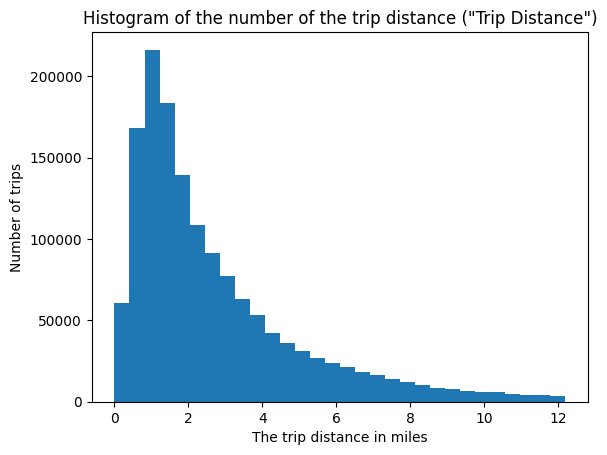

In [11]:
# plot histogram
trip_distance['trip_distance'].plot(kind = 'hist', bins = 30)
plt.title('Histogram of the number of the trip distance ("Trip Distance")') # add a title to the histogram
plt.xlabel('The trip distance in miles') #add x-label
plt.ylabel('Number of trips') #add y-label


The trip distance distribution is right skewness. So, the trips are not random value tell us that taxi may be driven by many reason such as people coming workplace early.

##### **Data Analysis**

The analysis below show the mean and median trip distance grouped by hour of day in table and graph.

In [12]:
# Add and create new datafram of hour_of_day data
trips['hour_of_day'] = trips['lpep_pickup_datetime'].dt.hour
hour_of_day = pd.DataFrame()

# Mean and Median of trip distance by pickup hour
hour_of_day['mean_trip_distance'] = trips.groupby('hour_of_day')['trip_distance'].mean()
hour_of_day['median_trip_distance'] = trips.groupby('hour_of_day')['trip_distance'].median()

In [13]:
# table for a visual insights
hour_of_day

,mean_trip_distance,median_trip_distance
hour_of_day,,
0,3.115276,2.20
1,3.017347,2.12
2,3.046176,2.14
3,3.212945,2.20
4,3.526555,2.36
5,4.133474,2.90
6,4.055149,2.84
7,3.284394,2.17
8,3.048450,1.98


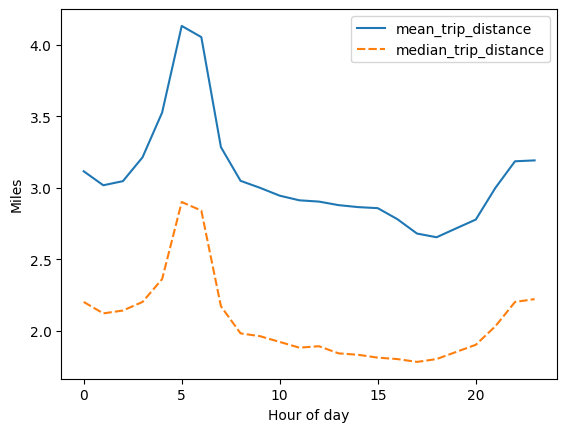

In [14]:
#plot for a visual insights
ax = sns.lineplot(data=hour_of_day)
ax.set(xlabel='Hour of day', ylabel='Miles')
plt.show()

The graph shown that the trip distance is peak in the morning and evening. But, in morning is higher than in evening.
It seems that the long trips can come from going to airport in New York.

The final rate code in effect at the end of the trip, which is **RatecodeID**, will tell us about originate/end at the airport. New York has two airports:
- JFK Airport in Queens, RatecodeID = 2
- Newark Airport in Queens, RatecodeID = 3


In [15]:
# create airport_trips dataframe to explore about trip that originate/end at the airport
airport_trips = trips[(trips['RatecodeID'] == 2) | (trips['RatecodeID'] == 3)].reset_index()
print('Number of trips origitate or terminate at NYC area airports:', airport_trips['RatecodeID'].count())

Number of trips origitate or terminate at NYC area airports: 5552


In [16]:
# Take a quick look at the numeric column statistics.
# See the descriptive statistic for numerical columns using .describe().
airport_trips.describe()

,index,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,hour_of_day
count,5.552000e+03,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000,5552.000000
mean,7.451936e+05,1.802954,2.201189,119.221182,120.853927,1.350324,10.378195,48.976945,0.056196,0.376801,4.353516,3.163352,0.283195,57.208420,1.687320,1.002702,13.008646
std,4.374423e+05,0.397803,0.400925,74.351229,66.000287,0.971919,9.616775,20.798826,0.209857,0.238492,8.130370,3.952420,0.096434,26.372664,0.649708,0.051913,5.660095
min,1.340000e+02,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,-52.000000,-1.000000,-0.500000,0.000000,-5.540000,-0.300000,-57.540000,1.000000,1.000000,0.000000
25%,3.620362e+05,2.000000,2.000000,60.000000,75.000000,1.000000,0.010000,52.000000,0.000000,0.500000,0.000000,0.000000,0.300000,52.800000,1.000000,1.000000,9.000000
50%,7.486425e+05,2.000000,2.000000,95.000000,132.000000,1.000000,14.890000,52.000000,0.000000,0.500000,0.000000,0.000000,0.300000,58.340000,2.000000,1.000000,14.000000
75%,1.124002e+06,2.000000,2.000000,166.000000,132.000000,1.000000,18.470000,52.000000,0.000000,0.500000,10.000000,5.540000,0.300000,69.990000,2.000000,1.000000,17.000000
max,1.494735e+06,2.000000,3.000000,265.000000,265.000000,6.000000,112.600000,182.500000,1.000000,0.500000,297.200000,44.580000,0.300000,350.000000,5.000000,2.000000,23.000000


We can see unsual data. for example, fare_amount,extra, mta_tax, tolls_amount, improvement_surcharge, and total_amount have negaive value. So, we need to clean data in Wranging Data section.

In [17]:
# Take a quick look on the average fair
print('Trips that originate or terminate at one of the NYC area airports have')
print('The average fair (total amount):', airport_trips[airport_trips.total_amount>=0]['total_amount'].mean())

Trips that originate or terminate at one of the NYC area airports have
The average fair (total amount): 59.957890942698704


In [18]:
#count the trip groupd by hour of day for airport trips
airport_trips_count = airport_trips.groupby('hour_of_day')['lpep_pickup_datetime'].count()
# create non_airport_trips dataframe to explore about trip that not originate/end at the airport
non_airport_trips = trips[(trips['RatecodeID'] != 2) & (trips['RatecodeID'] != 3)]
#count the trip groupd by hour of day for non airport trips
non_airport_trips_count = non_airport_trips.groupby('hour_of_day')['lpep_pickup_datetime'].count()

Text(0, 0.5, 'Number of trips')

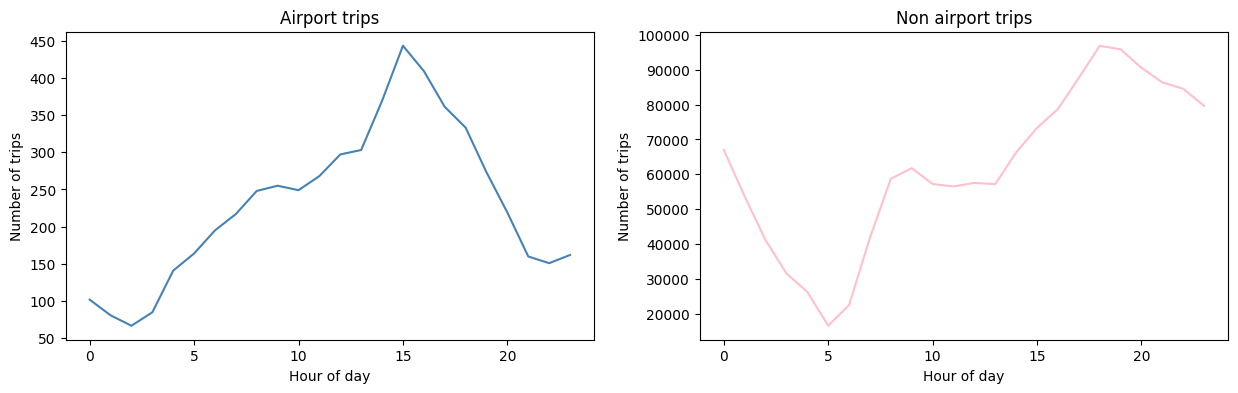

In [19]:
#fig, ax = plt.subplots(figsize=(5, 5))
fig,axes = plt.subplots(1,2,figsize = (15,4))
sns.lineplot(ax=axes[0], data=airport_trips_count, color = 'steelblue')
axes[0].set_title('Airport trips')
axes[0].set_xlabel('Hour of day')
axes[0].set_ylabel('Number of trips')
sns.lineplot(ax=axes[1], data=non_airport_trips_count, color = 'pink')
#specify axis labels
axes[1].set_title('Non airport trips')
axes[1].set_xlabel('Hour of day')
axes[1].set_ylabel('Number of trips')

The graphs shown that both airport trip and non airport trip are peak in the after noon.

Text(0, 0.5, 'Number of trips (normalized)')

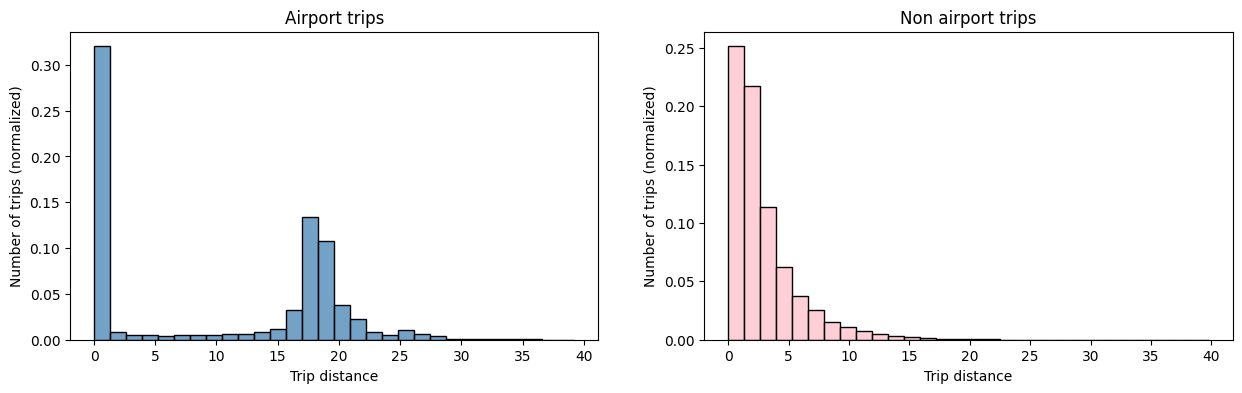

In [20]:
#fig, ax = plt.subplots(figsize=(5, 5))
fig,axes = plt.subplots(1,2,figsize = (15,4))
sns.histplot(ax=axes[0], data=airport_trips[airport_trips['trip_distance']<40]['trip_distance'], color = 'steelblue', bins=30, stat='density')
axes[0].set_title('Airport trips')
axes[0].set_xlabel('Trip distance')
axes[0].set_ylabel('Number of trips (normalized)')
sns.histplot(ax=axes[1], data=non_airport_trips[non_airport_trips['trip_distance']<40]['trip_distance'], color = 'pink', bins=30, stat='density')
#specify axis labels
axes[1].set_title('Non airport trips')
axes[1].set_xlabel('Trip distance')
axes[1].set_ylabel('Number of trips (normalized)')

There are two peak on airport trip that are less than 2 miles and between 18-19 miles, which is about Manhattan. \
However non airport trip is right right skewed.

#### **Build a predictive model**

**Data Wrangling**

Identify and calculate the missing values in each attribute

In [21]:
trips.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
lpep_dropoff_datetime          0
store_and_fwd_flag             0
RatecodeID                     0
PULocationID                   0
DOLocationID                   0
passenger_count                0
trip_distance                  0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
ehail_fee                1494927
improvement_surcharge          0
total_amount                   0
payment_type                   0
trip_type                      4
congestion_surcharge     1494927
hour_of_day                    0
dtype: int64

This shown that all value of ehail_fee and congestion_surcharge columns are null. The trip_type column have 4 null value.

In [22]:
# Drop ehail_fee and congestion_surcharge columns and null rows
trips=trips.drop(['ehail_fee', 'congestion_surcharge'], axis=1)
trips=trips.dropna(axis=0, how='any')

In [23]:
trips.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,hour_of_day
count,1.494923e+06,1.494923e+06,1.494923e+06,1.494923e+06,1.494923e+06,1.494923e+06,1.494923e+06,1.494923e+06,1.494923e+06,1.494923e+06,1.494923e+06,1.494923e+06,1.494923e+06,1.494923e+06,1.494923e+06,1.494923e+06
mean,1.782045e+00,1.097391e+00,1.175313e+02,1.309835e+02,1.370602e+00,2.968146e+00,1.254318e+01,3.512800e-01,4.866425e-01,1.235729e+00,1.231049e-01,2.921001e-01,1.503213e+01,1.540560e+00,1.022353e+00,1.353408e+01
std,4.128568e-01,6.154500e-01,7.772861e+01,7.727223e+01,1.039425e+00,3.076622e+00,1.008279e+01,3.663094e-01,8.504016e-02,2.431478e+00,8.910146e-01,5.073733e-02,1.155317e+01,5.232921e-01,1.478288e-01,6.799620e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,5.200000e+01,6.500000e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00,9.000000e+00
50%,2.000000e+00,1.000000e+00,9.300000e+01,1.290000e+02,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00,1.500000e+01
75%,2.000000e+00,1.000000e+00,1.810000e+02,1.950000e+02,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00,1.900000e+01
max,2.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00,2.300000e+01


According to data dictionary.\
The final rate code in effect at the end of the trip:\
    1 = Standard rate\
    2 = JFK\
    3 = Newark\
    4 = Nassau or Westchester\
    5 = Negotiated fare\
    6 = Group ride\
RatecodeID is 0 to 6. So, 99 is not possible.

In [24]:
# Select RatecodeID leass than or equals 6
trips = trips[trips.RatecodeID<=6]

Passenger_count vaule equal 0 that does not make any sense and the initial charge is 2.5$

In [25]:
trips = trips[ (trips['passenger_count']>0) & (trips['fare_amount'] >= 2.5)]

We can see that some rows are negative total amount. However, if we sum the absolute of fare_amount, extra, mta_tax, tip_amount, tolls_amount, and improvement_surcharge, it will equal the absolute of total_amount. This issue may cause by connection error or server.

Before we can continue we must deal with those values. Calculate below the absolube for negative sign.     

In [26]:
list_negative = ['fare_amount', 'extra', 'mta_tax','tip_amount','tolls_amount', 'improvement_surcharge', 'total_amount']
for s in list_negative:
    trips[s] = trips[s].apply(lambda x : abs(x) if x < 0 else x)

Build a derived variable for tip as a percentage of the total fare in a new column named **tip_percentage**

In [27]:
trips['tip_percentage'] = trips['tip_amount']/trips['total_amount']*100 

In [28]:
trips['tip_percentage'].describe()

count    1.487222e+06
mean     6.656409e+00
std      8.822601e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.666667e+01
max      9.891197e+01
Name: tip_percentage, dtype: float64

**Feature engineering**

After cleaning data, we wil the new feature to prepare them to put through model 
- with_tip: 1 = with tip, 0 = without trip
- speed
- Time: trip_duration, hour_of_day, day_of_week, day_of_month

In [29]:
# with tip
trips['with_tip'] = trips['tip_percentage'].apply(lambda x : 1 if x > 0 else 0)
# Time features and speed 
trips['trip_duration'] =  (trips['lpep_dropoff_datetime']- trips['lpep_pickup_datetime']).astype('timedelta64[s]')/60
trips['speed_mph'] = trips['trip_distance']/(trips['trip_duration']/60)
trips['speed_mph'] = trips['trip_distance']/(trips['trip_duration']/60)
trips['day_of_week'] = trips['lpep_pickup_datetime'].dt.dayofweek
#0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'
trips['day_of_month'] = trips['lpep_pickup_datetime'].dt.day


Text(0.5, 1.0, 'Distribution of tip (%), transaction with tips')

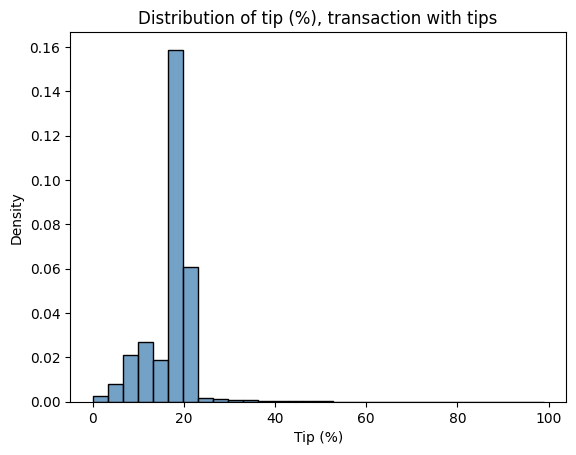

In [30]:
# plot histogram to see Tip % distribution
sns.histplot(data=trips[trips['tip_percentage']>0]['tip_percentage'], color = 'steelblue', bins=30, stat='density')
plt.xlabel('Tip (%)')
plt.title('Distribution of tip (%), transaction with tips')

Text(0.5, 1.0, 'speed_mph')

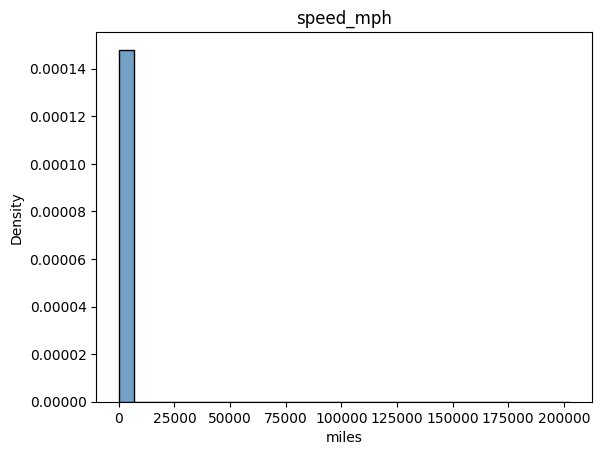

In [31]:
# plot histogram to see speed distribution
sns.histplot(data=trips[trips.speed_mph>0]['speed_mph'], color = 'steelblue', bins=30, stat='density')
plt.xlabel('miles')
plt.title('speed_mph')

Almost of speed is less than 50 mile/hour. So, we choose speed less than 50 miles and romove unusual data like inf, nan.  

In [32]:
trips = trips[~trips.speed_mph.isin([np.nan, np.inf, -np.inf])]
trips = trips[trips.speed_mph<240]

Copy trips dataframe to df to build model

In [33]:
df = trips.copy(deep=False)
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,hour_of_day,tip_percentage,with_tip,trip_duration,speed_mph,day_of_week,day_of_month
count,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06,1.484210e+06
mean,1.784834e+00,1.083264e+00,1.173892e+02,1.308594e+02,1.371623e+00,2.971374e+00,1.261885e+01,3.538266e-01,4.900277e-01,1.237734e+00,1.230964e-01,2.941153e-01,1.511780e+01,1.535475e+00,1.019036e+00,1.354189e+01,6.656751e+00,4.055713e-01,2.032936e+01,1.292099e+01,3.176320e+00,1.549396e+01
std,4.109373e-01,5.595451e-01,7.771339e+01,7.722160e+01,1.040646e+00,3.023578e+00,9.911250e+00,3.653406e-01,6.990501e-02,2.379218e+00,8.861388e-01,4.160282e-02,1.138239e+01,5.170794e-01,1.366529e-01,6.799423e+00,8.790395e+00,4.910024e-01,9.704185e+01,6.880623e+00,1.962122e+00,8.517623e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.666667e-02,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,5.200000e+01,6.500000e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.190000e+00,1.000000e+00,1.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,6.233333e+00,9.325301e+00,1.000000e+00,8.000000e+00
50%,2.000000e+00,1.000000e+00,9.300000e+01,1.290000e+02,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,1.046667e+01,1.176923e+01,3.000000e+00,1.600000e+01
75%,2.000000e+00,1.000000e+00,1.810000e+02,1.950000e+02,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00,1.900000e+01,1.666667e+01,1.000000e+00,1.730000e+01,1.504865e+01,5.000000e+00,2.300000e+01
max,2.000000e+00,6.000000e+00,2.650000e+02,2.650000e+02,9.000000e+00,2.462800e+02,5.000000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,3.000000e-01,5.000000e+02,5.000000e+00,2.000000e+00,2.300000e+01,9.891197e+01,1.000000e+00,1.439900e+03,2.390400e+02,6.000000e+00,3.000000e+01


In [34]:
# import GradientBoostingClassifier from sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

### **Modeling**

- Build GradientBoostingClassifier model to predict the tip status (with tip or without tip)
- Build GradientBoostingRegressor model to predict the tip percentage 

Select first 100,000 records in dataframe to train model and give to df_sample dataframe

In [35]:
df_sample = df[0:100000]

**GradientBoostingClassifier model**

In [36]:
predictor1 = ['payment_type','total_amount','trip_duration','speed_mph','mta_tax','extra','hour_of_day']
X = df_sample[predictor1]
y = df_sample.with_tip

In [37]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

parameters = {
    "learning_rate": [0.1],
    "min_samples_split": [2],
    "max_depth":[5],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse"],
    "subsample":[0.8],
    "n_estimators":[10]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10)

clf.fit(X_train, y_train)
print('The score on train set:',clf.score(X_train, y_train))
print(clf.best_params_)
result = clf.predict(X_test)
print('The score on test set:', clf.score(X_test, y_test))

The score on train set: 0.9365
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10, 'subsample': 0.8}
The score on test set: 0.9363666666666667


**GradientBoostingRegressor model**

In [38]:
predictor2 = [ 'total_amount' , 'trip_duration', 'speed_mph']

In [39]:
X = df_sample[predictor2]
y = df_sample.tip_percentage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
params = {
    "n_estimators": 200,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.1,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
score = reg.score(X_test, y_test)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The score on test set: {:.4f}".format(score))

The mean squared error (MSE) on test set: 17.9139
The score on test set: 0.7652


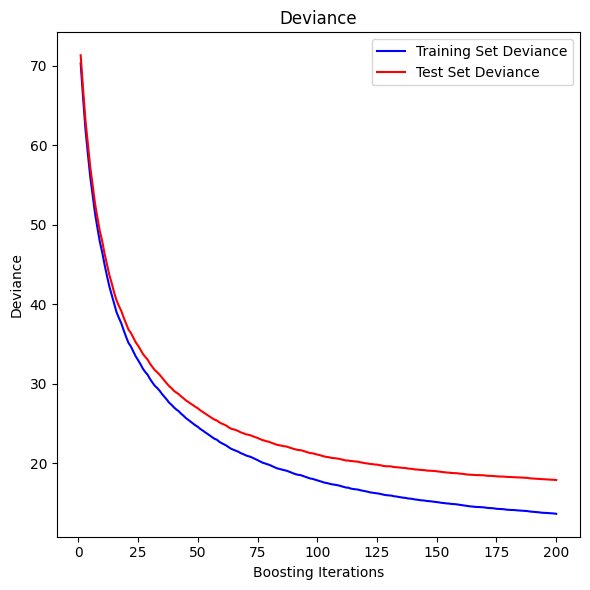

In [41]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

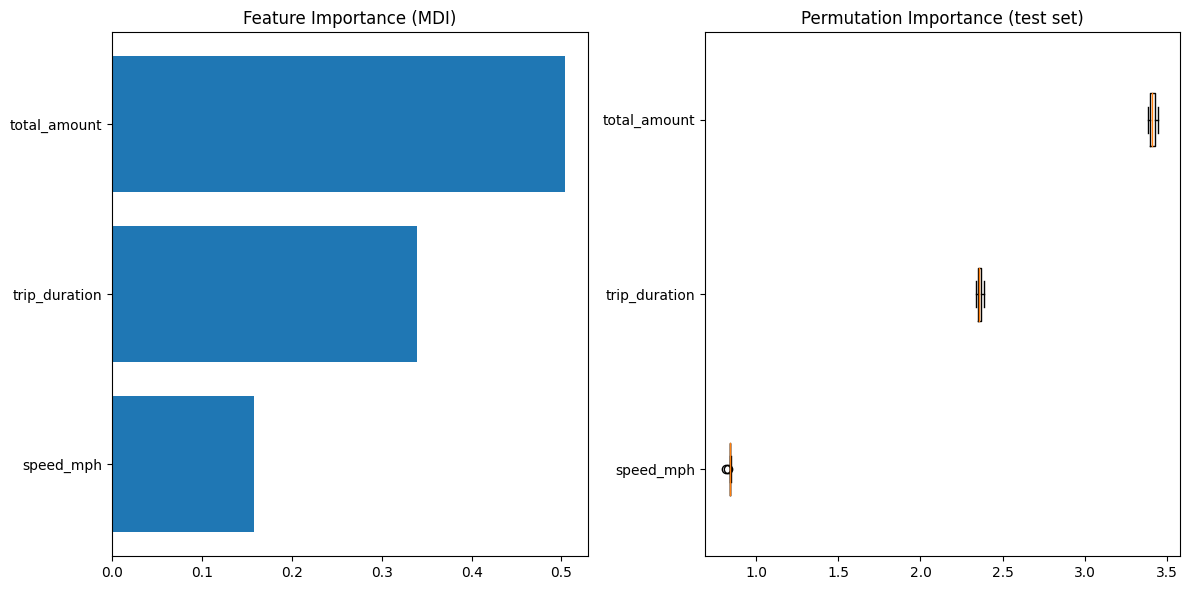

In [42]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

**Overall Model evaluation**

Test overall model with 200,000 - 1,000,000 index

In [43]:
df_sample2 = df[200000:1000000]
X_test2 = df_sample2[predictor2]
y_test2 = df_sample2.tip_percentage

The result of overall model show below

In [44]:
predict_value=clf.best_estimator_.predict(df_sample2[predictor1])*reg.predict(X_test2)
print('The mean squared error:', metrics.mean_squared_error(predict_value,y_test2))
print('The r2_score:', metrics.r2_score(predict_value,y_test2))

The mean squared error: 13.415402936071972
The r2_score: 0.7456356097817214


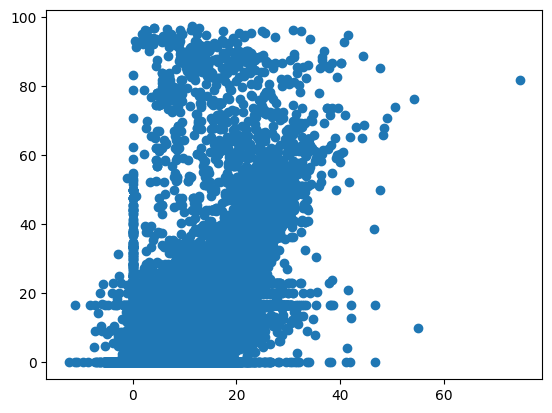

In [45]:
plt.scatter(predict_value,y_test2)

To do more in future or comment: 
- First, if I have more time, i will take time to understand and explore data more and more. Because it will give you better feature selection or feature engineering to build better model accuracy.
- Use more model such as decision tree, random forest and linear regression compared current model. Then choose the best one.
- Use cross validation, hyperpamater tuning technique might give better model
- Perform a statistic test can help like significant predictor

#### **Addition: Explore Distributions**

In [46]:
# Create column week to give week of year
trips['week'] = trips['lpep_pickup_datetime'].dt.week

C:\Users\santi.wo\AppData\Local\Temp\ipykernel_26512\2850548583.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  trips['week'] = trips['lpep_pickup_datetime'].dt.week


Determine the average trip speeds in all weeks of September

In [47]:
speed_avg_week = trips.groupby('week')['speed_mph'].mean()
speed_avg_week

week
36    13.372862
37    12.695122
38    12.691344
39    13.171674
40    12.502637
Name: speed_mph, dtype: float64

<AxesSubplot: xlabel='week', ylabel='speed_mph'>

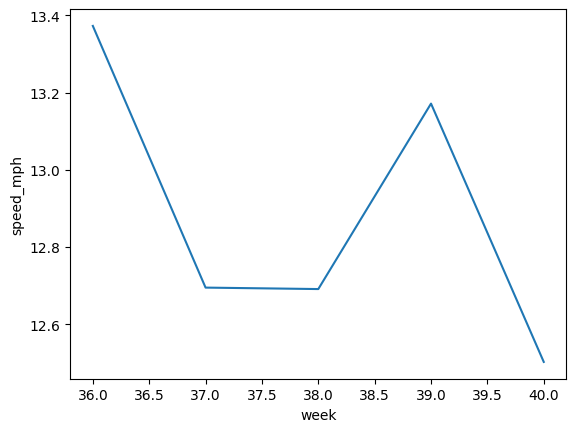

In [48]:
sns.lineplot(data=speed_avg_week)

We can see that the average trip speeds are not the same in all weeks of September.\
In my opinion, it the hourly traffic is the not same in all weeks. 
So, we explore more below

C:\Users\santi.wo\AppData\Local\Temp\ipykernel_26512\1095946051.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datafr=trips.groupby(['day_of_week','hour_of_day']).mean()
C:\Users\santi.wo\AppData\Local\Temp\ipykernel_26512\1095946051.py:2: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.lineplot(data = datafr, x = 'hour_of_day',y='speed_mph',hue='day_of_week', palette=sns.color_palette())


<AxesSubplot: xlabel='hour_of_day', ylabel='speed_mph'>

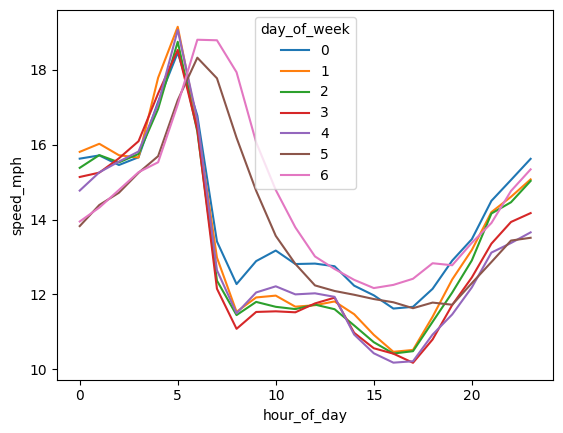

In [49]:
datafr=trips.groupby(['day_of_week','hour_of_day']).mean()
sns.lineplot(data = datafr, x = 'hour_of_day',y='speed_mph',hue='day_of_week', palette=sns.color_palette())
#0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'

The above figure shown that weekend speed in the late morning until evening is higher than weekday. It might result from the trafiic in weekend is less than weekday. The school and workplace is closed in weekend.

C:\Users\santi.wo\AppData\Local\Temp\ipykernel_26512\842793865.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datafr = trips.groupby(['hour_of_day','week']).mean()
C:\Users\santi.wo\AppData\Local\Temp\ipykernel_26512\842793865.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data = datafr, x = 'hour_of_day',y='speed_mph', hue='week',palette=sns.color_palette())


<AxesSubplot: xlabel='hour_of_day', ylabel='speed_mph'>

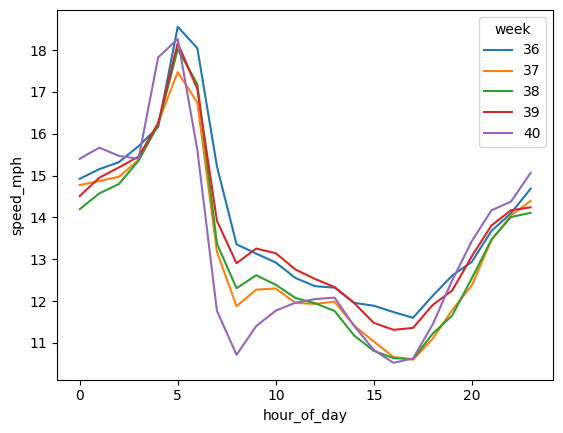

In [50]:
datafr = trips.groupby(['hour_of_day','week']).mean()
sns.lineplot(data = datafr, x = 'hour_of_day',y='speed_mph', hue='week',palette=sns.color_palette())

The above figure shown that hourly speed in all week have the similar trend. But, the magnitude is different.

C:\Users\santi.wo\AppData\Local\Temp\ipykernel_26512\2041689125.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datafr = trips.groupby(['hour_of_day','week']).mean()
C:\Users\santi.wo\AppData\Local\Temp\ipykernel_26512\2041689125.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data = trips[(trips.speed_mph<50)], x="speed_mph", col="week" ,bins=30,palette=sns.color_palette("husl", 9))


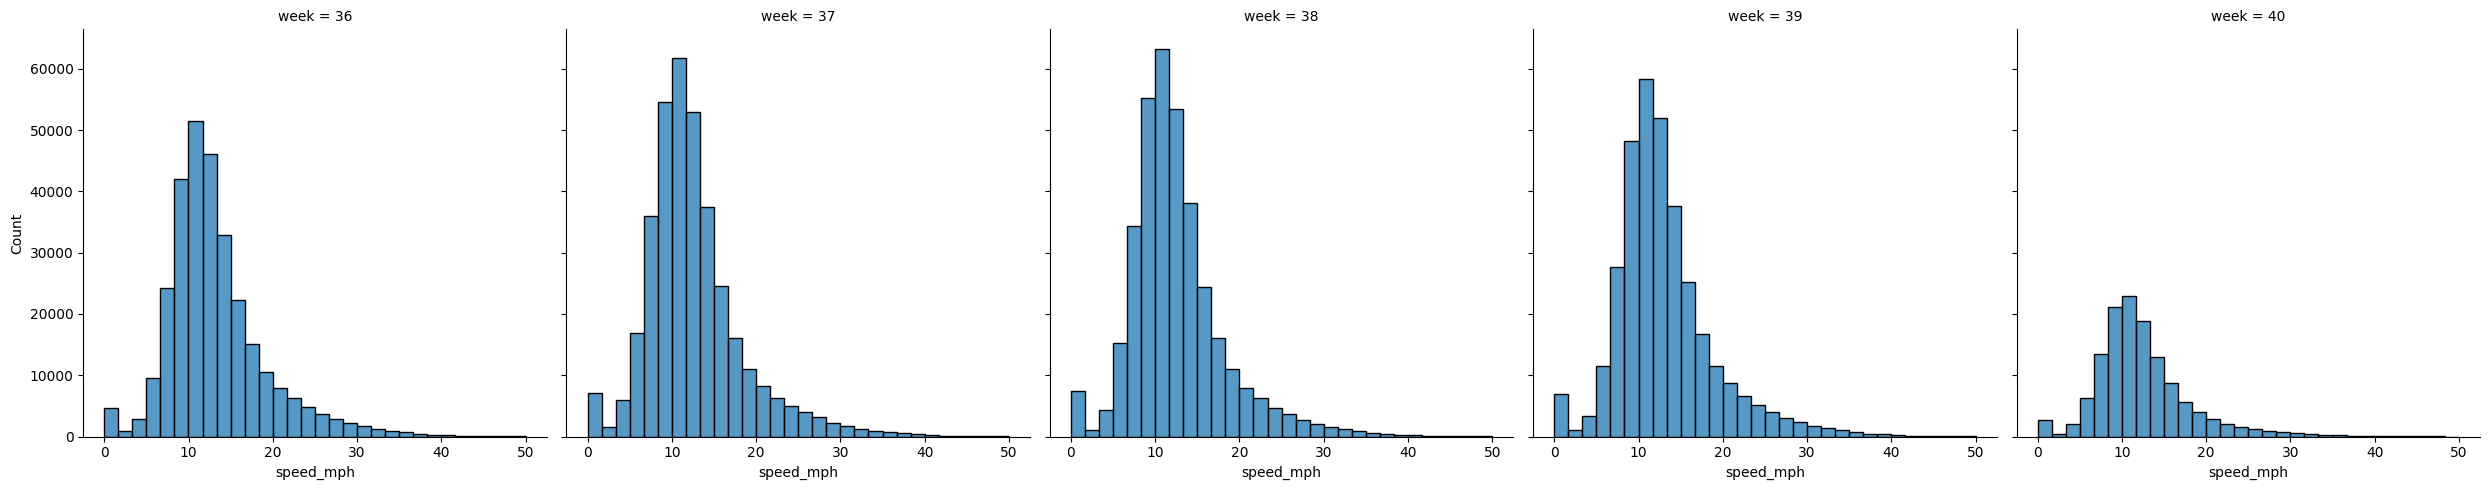

In [51]:
datafr = trips.groupby(['hour_of_day','week']).mean()
sns.displot(data = trips[(trips.speed_mph<50)], x="speed_mph", col="week" ,bins=30,palette=sns.color_palette("husl", 9))

C:\Users\santi.wo\AppData\Local\Temp\ipykernel_26512\2711739177.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datafr = trips.groupby(['hour_of_day','day_of_week']).mean()
C:\Users\santi.wo\AppData\Local\Temp\ipykernel_26512\2711739177.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data = trips[(trips.speed_mph<50)], x="speed_mph", col="day_of_week" ,bins=30,palette=sns.color_palette("husl", 9))


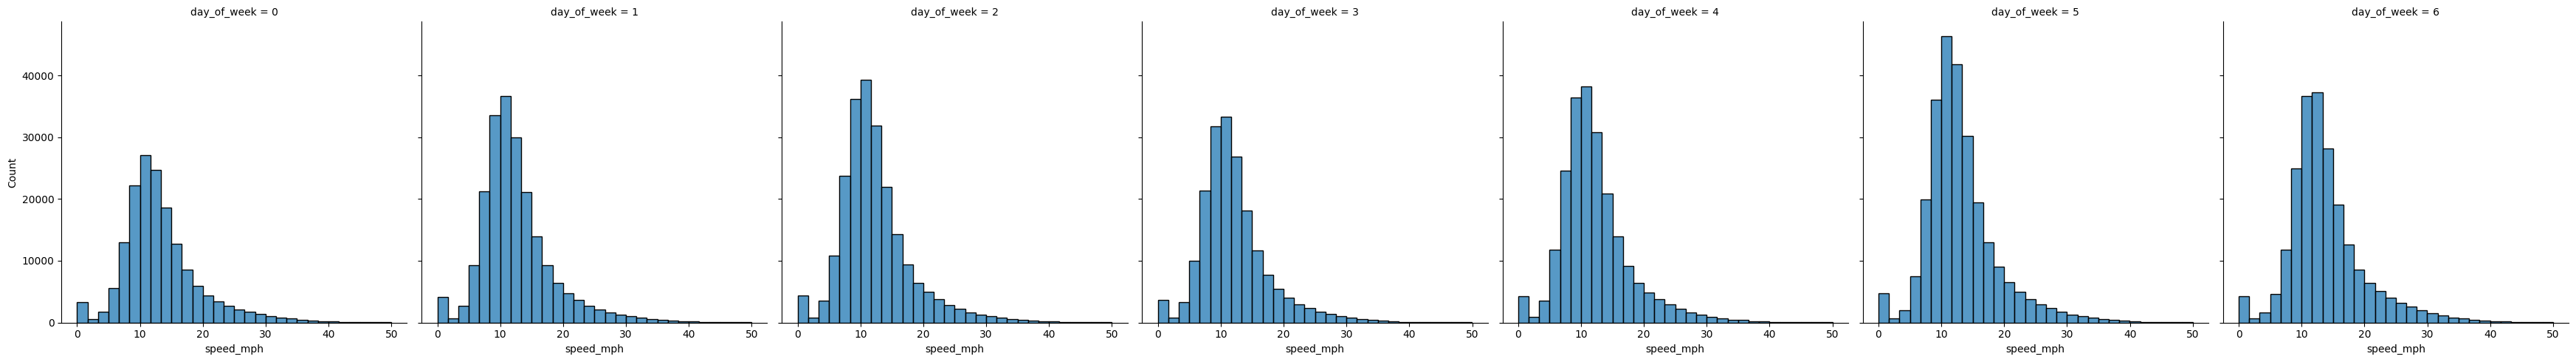

In [52]:
datafr = trips.groupby(['hour_of_day','day_of_week']).mean()
sns.displot(data = trips[(trips.speed_mph<50)], x="speed_mph", col="day_of_week" ,bins=30,palette=sns.color_palette("husl", 9))

The speed distribution represent in week or day, all are right skew and the center are around 10-12 mile/hour.

### **Reference**

- https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
- https://pandas.pydata.org/
- https://realpython.com/pandas-groupby/
- https://www.statology.org/pandas-filter-in-list/
- https://python-graph-gallery.com/110-basic-correlation-matrix-with-seaborn/
- https://mljar.com/blog/visualize-decision-tree/
- https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/
- https://medium.com/@adam.hajjej.ah/nyc-taxi-tip-amount-prediction-1bacf9eac920
- https://www.kaggle.com/code/taghreedaburwished/taxi-tip-prediction-using-scikit-learn-and-snap-ml
- https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/050.pdf
